# LSTM 모델 적용

### 패키지 import

In [19]:
import keras
import warnings

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set(font='Malgun Gothic',
       rc={'axes.unicode_minus':False})

import os
import warnings
warnings.filterwarnings(action='ignore')

fold_dir = 'C:/Users/joyh1/Desktop/DSC/DSC_음메/cow_data/final_data/'

### 데이터 불러오기 

In [2]:
data = pd.read_pickle(fold_dir+'final_data_0601.pkl')

### 불필요한 데이터 삭제 

In [3]:
del data['일강수량']

In [4]:
data

,주간날짜,번식우,번식우_no,번식우_편차,번식우_no_편차,미국소_생산량(가격화한값),돼지가격_평균,명절유무,한우가격_당일값_편차,한우가격_당일값,...,평균기온,최저기온,최고기온,합계일조시간,합계일사,최대 순간 풍속,최대 풍속(m/s),평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-20,1580,916,12.851852,-58.148148,226130.0,3016.00,0,NaN,12749.400,...,-0.414286,-3.300000,2.571429,4.014286,7.148571,9.671429,5.128571,-0.114286,44.428571,61.500000
1,2013-01-27,1580,916,12.851852,-58.148148,226130.0,2960.20,1,-372.200000,12377.200,...,2.885714,-1.657143,7.985714,6.114286,9.555714,8.928571,4.928571,0.414286,41.285714,59.685714
2,2013-02-03,1580,916,12.851852,-58.148148,187340.0,2967.80,1,-182.500000,12380.800,...,-0.571429,-4.742857,4.171429,7.000000,11.697143,9.914286,6.100000,0.342857,26.571429,47.257143
3,2013-02-10,1580,916,12.851852,-58.148148,187340.0,2730.40,0,-501.133667,12001.333,...,0.542857,-3.814286,5.485714,7.828571,13.700000,9.100000,5.385714,0.157143,20.571429,39.585714
4,2013-02-17,1580,916,12.851852,-58.148148,187340.0,2811.00,0,-376.783250,12000.400,...,1.714286,-2.542857,6.242857,7.685714,14.675714,11.500000,6.228571,2.071429,20.142857,36.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2018-08-05,1758,904,190.851852,-70.148148,242960.0,4699.40,0,2214.391062,17998.600,...,26.714286,24.642857,30.142857,3.471429,12.288571,6.500000,3.814286,29.657143,67.571429,82.942857
290,2018-08-12,1758,904,190.851852,-70.148148,242960.0,5037.20,0,2110.655231,17902.500,...,26.028571,22.100000,29.800000,8.771429,21.015714,7.700000,4.128571,28.671429,58.285714,76.971429
291,2018-08-19,1758,904,190.851852,-70.148148,242960.0,5158.75,0,1987.902120,17787.000,...,25.314286,21.771429,28.471429,4.042857,12.605714,7.814286,3.914286,26.628571,59.285714,74.114286
292,2018-08-26,1758,904,190.851852,-70.148148,242960.0,5207.60,0,2071.894236,17877.800,...,23.700000,21.042857,27.714286,4.057143,12.692857,7.000000,3.914286,25.100000,57.571429,79.028571


In [5]:
data2 = data.dropna()

### 시각화를 위해 주간날짜 index로 변환 

In [6]:
data2 = data2.set_index('주간날짜')

In [7]:
data2.isnull().sum()

번식우                0
번식우_no             0
번식우_편차             0
번식우_no_편차          0
미국소_생산량(가격화한값)     0
돼지가격_평균            0
명절유무               0
한우가격_당일값_편차        0
한우가격_당일값           0
한우가격_미래값(y값)_MA    0
한우가격_미래값(y값)       0
lag1_price         0
lag5_price         0
lag10_price        0
lag20_price        0
평균기온               0
최저기온               0
최고기온               0
합계일조시간             0
합계일사               0
최대 순간 풍속           0
최대 풍속(m/s)         0
평균지면온도             0
최소상대습도(%)          0
평균상대습도(%)          0
dtype: int64

In [8]:
cols = list(range(0,25))
i = 1
groups=cols

In [9]:
values = data2.resample('W').mean().values
values

array([[1590.        , 1014.        ,   22.85185185, ...,   25.05714286,
          61.        ,   79.35714286],
       [1590.        , 1014.        ,   22.85185185, ...,   26.85714286,
          53.57142857,   72.4       ],
       [1590.        , 1014.        ,   22.85185185, ...,   28.02857143,
          54.14285714,   75.42857143],
       ...,
       [1758.        ,  904.        ,  190.85185185, ...,   26.62857143,
          59.28571429,   74.11428571],
       [1758.        ,  904.        ,  190.85185185, ...,   25.1       ,
          57.57142857,   79.02857143],
       [1758.        ,  904.        ,  190.85185185, ...,   24.21428571,
          47.28571429,   64.85714286]])

### 시각화

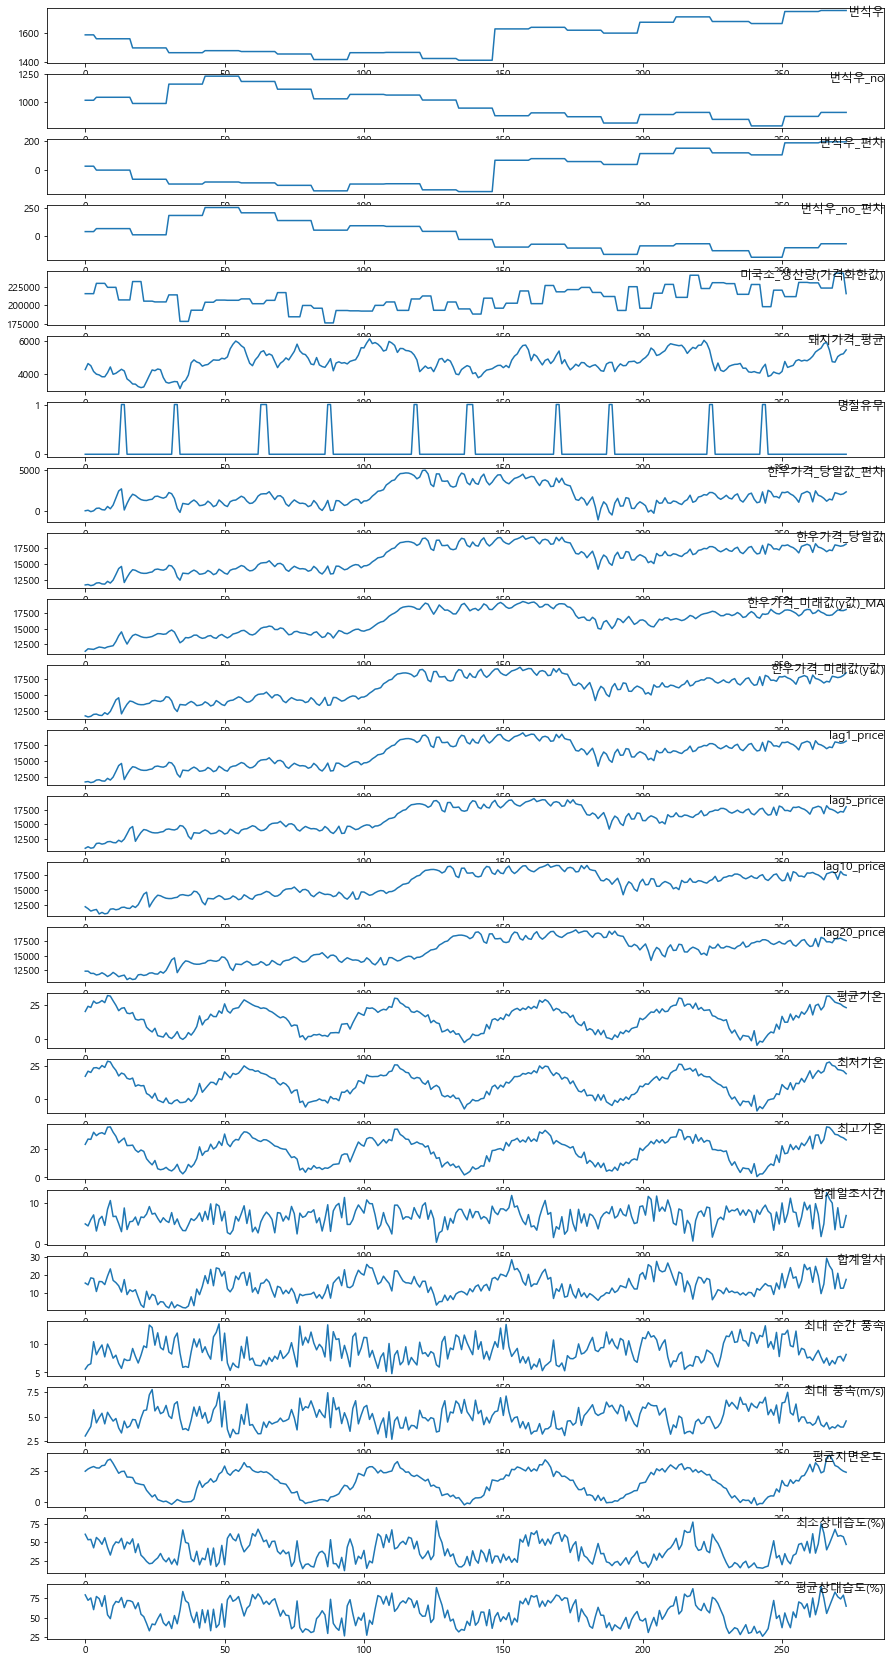

In [259]:
# plot each column
plt.figure(figsize=(15, 30))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(data2.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

In [9]:
train_x = data.drop(['한우가격_미래값(y값)'],axis=1)
train_y = data['한우가격_미래값(y값)']

In [10]:
data2 = data2.reset_index()

In [11]:
data.iloc[177]

주간날짜               2016-06-12 00:00:00
번식우                               1631
번식우_no                             874
번식우_편차                         63.8519
번식우_no_편차                     -100.148
미국소_생산량(가격화한값)                  219300
돼지가격_평균                           5706
명절유무                                 0
한우가격_당일값_편차                    4490.27
한우가격_당일값                       19410.2
한우가격_미래값(y값)_MA                19272.3
한우가격_미래값(y값)                   18885.2
lag1_price                     19410.2
lag5_price                     18476.6
lag10_price                    19106.4
lag20_price                      17674
평균기온                           22.3286
최저기온                           19.1857
최고기온                           26.2143
합계일조시간                         5.57143
합계일사                           16.4343
최대 순간 풍속                       7.78571
최대 풍속(m/s)                     4.48571
평균지면온도                         26.5286
최소상대습도(%)                      50.2857
평균상대습도(%)                

In [12]:
data2.head()

,주간날짜,번식우,번식우_no,번식우_편차,번식우_no_편차,미국소_생산량(가격화한값),돼지가격_평균,명절유무,한우가격_당일값_편차,한우가격_당일값,...,평균기온,최저기온,최고기온,합계일조시간,합계일사,최대 순간 풍속,최대 풍속(m/s),평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-06-09,1590,1014,22.851852,39.851852,215700.0,4252.75,0,-3.059150,11752.4,...,19.885714,17.071429,23.157143,4.871429,15.528571,5.585714,2.985714,25.057143,61.000000,79.357143
1,2013-06-16,1590,1014,22.851852,39.851852,215700.0,4613.20,0,62.086524,11817.4,...,23.700000,20.900000,26.842857,4.385714,14.534286,6.285714,3.471429,26.857143,53.571429,72.400000
2,2013-06-23,1590,1014,22.851852,39.851852,215700.0,4482.80,0,-109.535591,11648.6,...,22.842857,19.957143,26.642857,5.914286,18.434286,6.528571,3.971429,28.028571,54.142857,75.428571
3,2013-06-30,1590,1014,22.851852,39.851852,215700.0,4133.00,0,-5.973174,11747.4,...,27.542857,23.371429,31.628571,7.042857,18.040000,10.385714,5.700000,28.857143,42.714286,60.357143
4,2013-07-07,1563,1041,-4.148148,66.851852,229410.0,3971.60,0,293.675708,12046.8,...,25.857143,23.600000,29.257143,3.157143,10.810000,8.114286,4.342857,27.757143,56.714286,77.314286


In [13]:
split_date = pd.Timestamp('2016-06-12')

In [14]:
data2['주간날짜'] = pd.to_datetime(data2['주간날짜'])

In [15]:
data2

,주간날짜,번식우,번식우_no,번식우_편차,번식우_no_편차,미국소_생산량(가격화한값),돼지가격_평균,명절유무,한우가격_당일값_편차,한우가격_당일값,...,평균기온,최저기온,최고기온,합계일조시간,합계일사,최대 순간 풍속,최대 풍속(m/s),평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-06-09,1590,1014,22.851852,39.851852,215700.0,4252.75,0,-3.059150,11752.4,...,19.885714,17.071429,23.157143,4.871429,15.528571,5.585714,2.985714,25.057143,61.000000,79.357143
1,2013-06-16,1590,1014,22.851852,39.851852,215700.0,4613.20,0,62.086524,11817.4,...,23.700000,20.900000,26.842857,4.385714,14.534286,6.285714,3.471429,26.857143,53.571429,72.400000
2,2013-06-23,1590,1014,22.851852,39.851852,215700.0,4482.80,0,-109.535591,11648.6,...,22.842857,19.957143,26.642857,5.914286,18.434286,6.528571,3.971429,28.028571,54.142857,75.428571
3,2013-06-30,1590,1014,22.851852,39.851852,215700.0,4133.00,0,-5.973174,11747.4,...,27.542857,23.371429,31.628571,7.042857,18.040000,10.385714,5.700000,28.857143,42.714286,60.357143
4,2013-07-07,1563,1041,-4.148148,66.851852,229410.0,3971.60,0,293.675708,12046.8,...,25.857143,23.600000,29.257143,3.157143,10.810000,8.114286,4.342857,27.757143,56.714286,77.314286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2018-08-05,1758,904,190.851852,-70.148148,242960.0,4699.40,0,2214.391062,17998.6,...,26.714286,24.642857,30.142857,3.471429,12.288571,6.500000,3.814286,29.657143,67.571429,82.942857
270,2018-08-12,1758,904,190.851852,-70.148148,242960.0,5037.20,0,2110.655231,17902.5,...,26.028571,22.100000,29.800000,8.771429,21.015714,7.700000,4.128571,28.671429,58.285714,76.971429
271,2018-08-19,1758,904,190.851852,-70.148148,242960.0,5158.75,0,1987.902120,17787.0,...,25.314286,21.771429,28.471429,4.042857,12.605714,7.814286,3.914286,26.628571,59.285714,74.114286
272,2018-08-26,1758,904,190.851852,-70.148148,242960.0,5207.60,0,2071.894236,17877.8,...,23.700000,21.042857,27.714286,4.057143,12.692857,7.000000,3.914286,25.100000,57.571429,79.028571


In [14]:
train = data2.iloc[:220,:]
test = data2.iloc[220:]

In [15]:
import pickle

In [30]:
# train data를 pickle파일로 저장
# test data를 pickle파일로 저장
fold_dir = 'C:/Users/joyh1/Desktop/DSC/DSC_음메/cow_data/final_data/'
with open(fold_dir+'train_0602.pkl', 'wb') as f:
    pickle.dump(train, f)

with open(fold_dir+'test_0602.pkl', 'wb') as f:
    pickle.dump(test, f)


In [21]:
train = pd.read_pickle(fold_dir+'train_0602.pkl')
test = pd.read_pickle(fold_dir+'test_0602.pkl')

In [22]:
train.columns

Index(['주간날짜', '번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)',
       '돼지가격_평균', '명절유무', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA',
       '한우가격_미래값(y값)', 'lag1_price', 'lag5_price', 'lag10_price',
       'lag20_price', '평균기온', '최저기온', '최고기온', '합계일조시간', '합계일사', '최대 순간 풍속',
       '최대 풍속(m/s)', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)'],
      dtype='object')

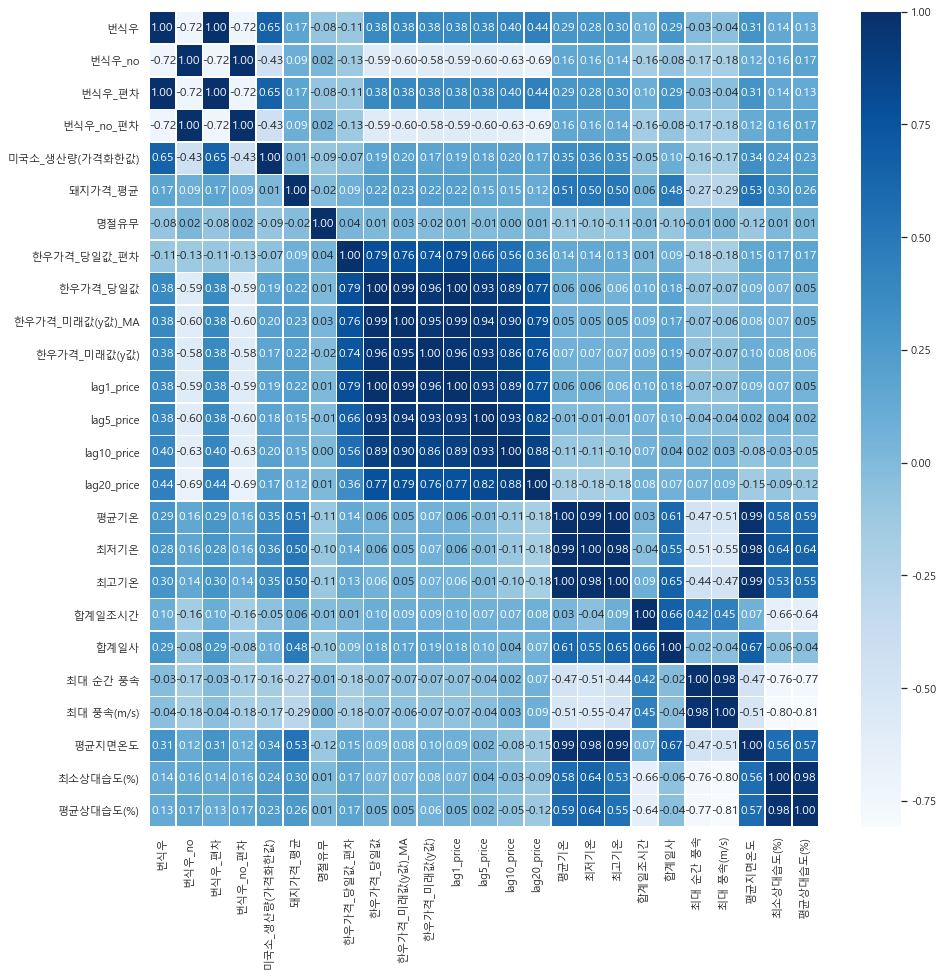

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data2.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

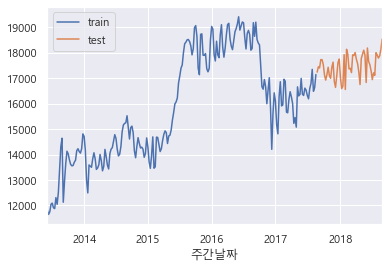

In [16]:
ax = train['한우가격_미래값(y값)'].plot()
test['한우가격_미래값(y값)'].plot(ax=ax)
plt.legend(['train', 'test'])

In [23]:
train.columns

Index(['주간날짜', '번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)',
       '돼지가격_평균', '명절유무', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA',
       '한우가격_미래값(y값)', 'lag1_price', 'lag5_price', 'lag10_price',
       'lag20_price', '평균기온', '최저기온', '최고기온', '합계일조시간', '합계일사', '최대 순간 풍속',
       '최대 풍속(m/s)', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)'],
      dtype='object')

### 정규화

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

train_x = scaler.fit_transform(train.drop(['주간날짜','한우가격_미래값(y값)'],axis=1))
test_x = scaler.transform(test.drop(['주간날짜','한우가격_미래값(y값)'],axis=1))
train_y= scaler.fit_transform(pd.DataFrame(train['한우가격_미래값(y값)']))
test_y= scaler.transform(pd.DataFrame(test['한우가격_미래값(y값)']))

In [52]:
feature_names = train.drop(['주간날짜','한우가격_미래값(y값)'],axis=1).columns
feature_names = [list(i) for i in feature_names]
feature_names = [''.join(i) for i in feature_names]
print(feature_names)

['번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)', '돼지가격_평균', '명절유무', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA', 'lag1_price', 'lag5_price', 'lag10_price', 'lag20_price', '평균기온', '최저기온', '최고기온', '합계일조시간', '합계일사', '최대 순간 풍속', '최대 풍속(m/s)', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)']


### feature selection

In [53]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import datasets, linear_model

clf = linear_model.LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 15,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(train_x, train_y,custom_feature_names=feature_names)

In [54]:
sfs1.k_feature_idx_

(4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23)

In [55]:
features = list(sfs1.k_feature_names_)

In [56]:
train_x = scaler.fit_transform(train[features])
test_x = scaler.transform(test[features])
train_y= scaler.fit_transform(pd.DataFrame(train['한우가격_미래값(y값)']))
test_y= scaler.transform(pd.DataFrame(test['한우가격_미래값(y값)']))

In [57]:
train_X = train_x.reshape(train_x.shape[0], 1, train_x.shape[1])
test_X = test_x.reshape(test_x.shape[0], 1, test_x.shape[1])

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(220, 1, 15) (220, 1) (54, 1, 15) (54, 1)


### Modeling1

In [58]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(4, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [59]:
history = model.fit(train_X, train_y, epochs=500, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 220 samples, validate on 54 samples
Epoch 1/500
 - 1s - loss: 0.6637 - val_loss: 0.9343
Epoch 2/500
 - 0s - loss: 0.6065 - val_loss: 0.8812
Epoch 3/500
 - 0s - loss: 0.5876 - val_loss: 0.8310
Epoch 4/500
 - 0s - loss: 0.5473 - val_loss: 0.7834
Epoch 5/500
 - 0s - loss: 0.5249 - val_loss: 0.7389
Epoch 6/500
 - 0s - loss: 0.4857 - val_loss: 0.6976
Epoch 7/500
 - 0s - loss: 0.4526 - val_loss: 0.6594
Epoch 8/500
 - 0s - loss: 0.4281 - val_loss: 0.6238
Epoch 9/500
 - 0s - loss: 0.4012 - val_loss: 0.5906
Epoch 10/500
 - 0s - loss: 0.3829 - val_loss: 0.5598
Epoch 11/500
 - 0s - loss: 0.3627 - val_loss: 0.5313
Epoch 12/500
 - 0s - loss: 0.3395 - val_loss: 0.5046
Epoch 13/500
 - 0s - loss: 0.3200 - val_loss: 0.4795
Epoch 14/500
 - 0s - loss: 0.3060 - val_loss: 0.4561
Epoch 15/500
 - 0s - loss: 0.2834 - val_loss: 0.4341
Epoch 16/500
 - 0s - loss: 0.2718 - val_loss: 0.4132
Epoch 17/500
 - 0s - loss: 0.2578 - val_loss: 0.3934
Epoch 18/500
 - 0s - loss: 0.2376 - val_loss: 0.3745
Epoch 19/5

Epoch 154/500
 - 0s - loss: 0.0307 - val_loss: 0.0115
Epoch 155/500
 - 0s - loss: 0.0277 - val_loss: 0.0114
Epoch 156/500
 - 0s - loss: 0.0298 - val_loss: 0.0112
Epoch 157/500
 - 0s - loss: 0.0238 - val_loss: 0.0109
Epoch 158/500
 - 0s - loss: 0.0281 - val_loss: 0.0107
Epoch 159/500
 - 0s - loss: 0.0271 - val_loss: 0.0107
Epoch 160/500
 - 0s - loss: 0.0263 - val_loss: 0.0108
Epoch 161/500
 - 0s - loss: 0.0253 - val_loss: 0.0110
Epoch 162/500
 - 0s - loss: 0.0310 - val_loss: 0.0111
Epoch 163/500
 - 0s - loss: 0.0305 - val_loss: 0.0109
Epoch 164/500
 - 0s - loss: 0.0271 - val_loss: 0.0107
Epoch 165/500
 - 0s - loss: 0.0303 - val_loss: 0.0104
Epoch 166/500
 - 0s - loss: 0.0288 - val_loss: 0.0103
Epoch 167/500
 - 0s - loss: 0.0267 - val_loss: 0.0101
Epoch 168/500
 - 0s - loss: 0.0242 - val_loss: 0.0098
Epoch 169/500
 - 0s - loss: 0.0282 - val_loss: 0.0098
Epoch 170/500
 - 0s - loss: 0.0298 - val_loss: 0.0100
Epoch 171/500
 - 0s - loss: 0.0236 - val_loss: 0.0102
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.0195 - val_loss: 0.0077
Epoch 307/500
 - 0s - loss: 0.0196 - val_loss: 0.0082
Epoch 308/500
 - 0s - loss: 0.0199 - val_loss: 0.0086
Epoch 309/500
 - 0s - loss: 0.0222 - val_loss: 0.0085
Epoch 310/500
 - 0s - loss: 0.0178 - val_loss: 0.0084
Epoch 311/500
 - 0s - loss: 0.0172 - val_loss: 0.0085
Epoch 312/500
 - 0s - loss: 0.0219 - val_loss: 0.0082
Epoch 313/500
 - 0s - loss: 0.0179 - val_loss: 0.0080
Epoch 314/500
 - 0s - loss: 0.0153 - val_loss: 0.0081
Epoch 315/500
 - 0s - loss: 0.0141 - val_loss: 0.0081
Epoch 316/500
 - 0s - loss: 0.0191 - val_loss: 0.0082
Epoch 317/500
 - 0s - loss: 0.0195 - val_loss: 0.0079
Epoch 318/500
 - 0s - loss: 0.0195 - val_loss: 0.0076
Epoch 319/500
 - 0s - loss: 0.0201 - val_loss: 0.0075
Epoch 320/500
 - 0s - loss: 0.0156 - val_loss: 0.0075
Epoch 321/500
 - 0s - loss: 0.0172 - val_loss: 0.0077
Epoch 322/500
 - 0s - loss: 0.0174 - val_loss: 0.0082
Epoch 323/500
 - 0s - loss: 0.0175 - val_loss: 0.0084
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.0149 - val_loss: 0.0084
Epoch 459/500
 - 0s - loss: 0.0131 - val_loss: 0.0082
Epoch 460/500
 - 0s - loss: 0.0144 - val_loss: 0.0085
Epoch 461/500
 - 0s - loss: 0.0129 - val_loss: 0.0088
Epoch 462/500
 - 0s - loss: 0.0147 - val_loss: 0.0083
Epoch 463/500
 - 0s - loss: 0.0182 - val_loss: 0.0081
Epoch 464/500
 - 0s - loss: 0.0147 - val_loss: 0.0078
Epoch 465/500
 - 0s - loss: 0.0135 - val_loss: 0.0076
Epoch 466/500
 - 0s - loss: 0.0150 - val_loss: 0.0078
Epoch 467/500
 - 0s - loss: 0.0140 - val_loss: 0.0079
Epoch 468/500
 - 0s - loss: 0.0107 - val_loss: 0.0081
Epoch 469/500
 - 0s - loss: 0.0144 - val_loss: 0.0082
Epoch 470/500
 - 0s - loss: 0.0141 - val_loss: 0.0080
Epoch 471/500
 - 0s - loss: 0.0115 - val_loss: 0.0075
Epoch 472/500
 - 0s - loss: 0.0131 - val_loss: 0.0073
Epoch 473/500
 - 0s - loss: 0.0169 - val_loss: 0.0076
Epoch 474/500
 - 0s - loss: 0.0131 - val_loss: 0.0080
Epoch 475/500
 - 0s - loss: 0.0147 - val_loss: 0.0083
Epoch 476/500
 - 0s - loss: 

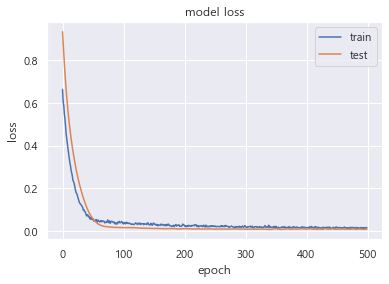

In [60]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

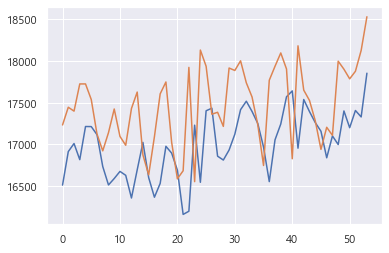

In [61]:

trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

trainPredict = scaler.inverse_transform(trainPredict)
trainPredict

train_y = scaler.inverse_transform(train_y)
train_y

testPredict = scaler.inverse_transform(testPredict)
test_y = scaler.inverse_transform(test_y)

plt.plot(testPredict)
plt.plot(test_y)
plt.show()

In [281]:
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(train_y,trainPredict[:,0]))
print('TrainScore:%.df RMSE'%(trainScore))
testScore = math.sqrt(mean_squared_error(test_y,testPredict[:,0]))
print('TestScore:%.df RMSE'%(testScore))

TrainScore:1284f RMSE
TestScore:1004f RMSE


In [282]:
print(testScore)
print(trainScore)

1004.6468830186054
1284.0383505146704


In [283]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(mean_absolute_percentage_error(train_y,trainPredict[:,0]))
print(mean_absolute_percentage_error(test_y,testPredict[:,0]))

14.061133977662315
5.147161597349134


### Modeling2
feature selection 안한 것

In [284]:
train_x = scaler.fit_transform(train[feature_names])
test_x = scaler.transform(test[feature_names])
train_y= scaler.fit_transform(pd.DataFrame(train['한우가격_미래값(y값)']))
test_y= scaler.transform(pd.DataFrame(test['한우가격_미래값(y값)']))

In [285]:
train_X = train_x.reshape(train_x.shape[0], 1, train_x.shape[1])
test_X = test_x.reshape(test_x.shape[0], 1, test_x.shape[1])

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(177, 1, 24) (177, 1) (97, 1, 24) (97, 1)


In [286]:

K.clear_session() 

model = Sequential()
model.add(LSTM(4, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [287]:
history = model.fit(train_X, train_y, epochs=100, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 177 samples, validate on 97 samples
Epoch 1/100
 - 0s - loss: 0.2298 - val_loss: 0.2275
Epoch 2/100
 - 0s - loss: 0.1985 - val_loss: 0.2050
Epoch 3/100
 - 0s - loss: 0.1831 - val_loss: 0.1837
Epoch 4/100
 - 0s - loss: 0.1572 - val_loss: 0.1637
Epoch 5/100
 - 0s - loss: 0.1476 - val_loss: 0.1452
Epoch 6/100
 - 0s - loss: 0.1448 - val_loss: 0.1281
Epoch 7/100
 - 0s - loss: 0.1480 - val_loss: 0.1128
Epoch 8/100
 - 0s - loss: 0.1115 - val_loss: 0.0988
Epoch 9/100
 - 0s - loss: 0.1159 - val_loss: 0.0862
Epoch 10/100
 - 0s - loss: 0.1003 - val_loss: 0.0749
Epoch 11/100
 - 0s - loss: 0.0865 - val_loss: 0.0649
Epoch 12/100
 - 0s - loss: 0.1084 - val_loss: 0.0561
Epoch 13/100
 - 0s - loss: 0.1022 - val_loss: 0.0484
Epoch 14/100
 - 0s - loss: 0.0774 - val_loss: 0.0417
Epoch 15/100
 - 0s - loss: 0.0786 - val_loss: 0.0358
Epoch 16/100
 - 0s - loss: 0.0694 - val_loss: 0.0308
Epoch 17/100
 - 0s - loss: 0.0663 - val_loss: 0.0266
Epoch 18/100
 - 0s - loss: 0.0616 - val_loss: 0.0232
Epoch 19/1

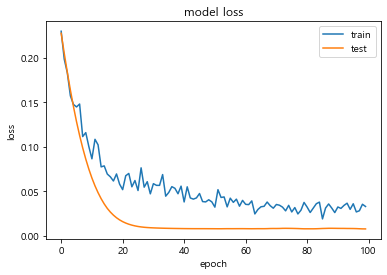

In [288]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

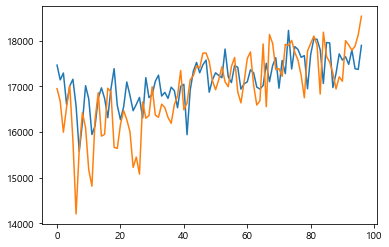

In [289]:
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

trainPredict = scaler.inverse_transform(trainPredict)
trainPredict

train_y = scaler.inverse_transform(train_y)
train_y

testPredict = scaler.inverse_transform(testPredict)
test_y = scaler.inverse_transform(test_y)

plt.plot(testPredict)
plt.plot(test_y)
plt.show()

In [290]:

print(mean_absolute_percentage_error(train_y,trainPredict[:,0]))
print(mean_absolute_percentage_error(test_y,testPredict[:,0]))

15.006020826545655
4.713036882036388
